# DATA 1030 Midterm Project — Alejandro Contreras

This jupyter notebook serves to document the following steps:
- Download Data for 2020 California Health Interview Survey 
- Perform EDA
- Split Data into multiple datasets

**Ensure Data1030 Environment is Running**

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.


/Users/alejandroalexcontreras/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] xgboost version 1.5.1 is installed.
[ OK ] shap version 0.40.0 is installed.


**Libraries/Packages that will be used**

In [2]:
#Import Packages
import pandas as pd #For Data Manipulation
import numpy as np #For mathematical Operations
import matplotlib #For Creating Figures
from matplotlib import pylab as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, mutual_info_regression
import os #For Working with File Locations
#import urllib #Import data from URLs
#import requests #Import data from URLs that download as Zip files
#import zipfile #Import data from URLs that download as Zip files
#import io #Import data from URLs that download as Zip files

Verify the working directory

In [3]:
#Get current working directory
print(os.getcwd())

/Users/alejandroalexcontreras/Desktop/DATA1030-Fall2022/Midterm Project


**Download the 2020 California Health Interview Survey**

Note: the data is only available to researchers who contain an account with UCLA's Center for Health Policy Research. Accounts are free, although they can take some time to be approved. https://healthpolicy.ucla.edu/chis/Pages/default.aspx

The data dictionary can be found here: https://healthpolicy.ucla.edu/chis/data/public-use-data-file/Documents/CHIS%202020%20Data%20Dictionary%20-%20Adult%20May%202022.pdf

The questionnaire can be found here: https://healthpolicy.ucla.edu/chis/data/public-use-data-file/Documents/2020/CHIS%202020%20CAWI%20Adult%20Questionnaire.pdf

In [6]:
data = pd.read_stata('ADULT_2020.dta')

In [7]:
print("The original dataset contains", data.shape[0], "rows and", data.shape[1], "columns.")

The original dataset contains 21949 rows and 604 columns.


Given that we do not need all of the columns, we will only get the data from the following sections:

- Section A — Demographics part I

- Section G — Demographics part II

- Section K — Employment, Income, Poverty Status, Food Security

- Section M — Housing and Social Cohesion

- Section P —  Voter Engagement

**Section A**
SRAGE_P1
SRSEX
LATIN2TP
OMBSRR_P1
RACECN_P1
RACEDF_P1
RACEHP2_P1
AA5C
AA5G
MARIT
MARIT_45
MARIT2
INTV_MODE2

**Section G**
AH33NEW
AH34NEW
AH35NEW
LNGHM_P1
AH37
SPK_ENG
CITIZEN2
YRUS_P1
PCTLF_P
AH44
AH43A
AH44A
AH44B
ACHLDC_P1
AHEDC_P1
AG52
AG53
AG8
AG9_P1
AG10
AG11
WRKST_P1
AG22
AG31
SERVED
SREDUC
FAMTYP_P
FAMSIZE2_P1
FAMT4

**Section K**
AK1
AK2_P1
AK3_P1V2
AK4
INDMAIN2
IND_FLAG3
OCCMAIN2
OCC_FLAG3
AK7_P1V2
AKWKLNG
AK8
AK10_P
AK20_P1
AK22_P1
AK10A_P
AK32V2
AK33V2_P1
AM1
AM2
AM3
AM3A
AM4
AM5
FSLEV
FSLEVCB
POVGWD_P1
POVLL2_P1V2
POVLL
ELGMAGI3
ELGMAGI4
ELGMAGI5
ELDER_IDX

**Section M**
AM37
AJ178
AK23
AM39
AM44
AM45
AM48
AK25
AM19
AM20
AM21
AK28

**Section P**
AP73V2
AP74V2
AP75V2
VOTE_ENG2
AP80
VOTE_RSNNO

In [ ]:
#Economics = ["ak7_p1v2", "ak3_p1v2", "ak10_p", "ak10a_p", "ak20_p1"]
#
#Demographics = ["srsex", "srage_p1", "sreduc"]
#
#Family_History = ["ah34new", "ah35new", "citizen2", "famsize2_p1"]
#
#Military = ["ag22"]
#
#Housing = ["ur_bg6", "ak25"]
#
#Civics = ["am39", "am44", "am45", "am48"]
#
#Politics = ["ap73v2", "ap74v2", "ap75v2"]

In [8]:
Demographics_I = ["srage_p1", "srsex", "latin2tp", "ombsrr_p1", "racecn_p1", "racedf_p1", 
                  "racehp2_p1", "aa5c", "aa5g", "marit", "marit_45", "marit2", "intv_mode2"]

Demographics_II = ["ah33new", "ah34new", "ah35new", "lnghm_p1", "ah37", "spk_eng", "citizen2", "yrus_p1", 
                   "pctlf_p", "ah44", "ah43a", "ah44a", "ah44b", "achldc_p1", "ahedc_p1", "ag52", 
                   "ag53", "ag8", "ag9_p1", "ag10", "ag11", "wrkst_p1", "ag22", "ag31", "served", "sreduc", 
                   "famtyp_p", "famsize2_p1", "famt4"]

Emp_Inc_Pov_Food = ["ak1", "ak2_p1", "ak3_p1v2", "ak4", "indmain2", "ind_flag3", "occmain2", "occ_flag3",
                    "ak7_p1v2", "akwklng", "ak8", "ak10_p", "ak20_p1", "ak22_p1", "ak10a_p", "ak32v2", 
                    "ak33v2_p1", "am1", "am2", "am3", "am3a", "am4", "am5", "fslev", "fslevcb", "povgwd_p1",
                    "povll2_p1v2", "povll", "elgmagi3", "elgmagi4", "elgmagi5", "elder_idx"]

Housing = ["am37", "aj178", "ak23", "am39", "am44", "am45", "am48", "ak25", "am19", "am20", "am21", "ak28"]

Voting = ["ap73v2", "ap74v2", "ap75v2", "vote_eng2", "ap80", "vote_rsnno"]

Housing_Insecurity = ["cv7_6"]

In [ ]:
# iterating the columns
#for col in data.columns:
#    print(col)

In [9]:
data_new = data[Demographics_I + Demographics_II + Emp_Inc_Pov_Food + Housing + Voting + Housing_Insecurity]

In [10]:
data_new

,srage_p1,srsex,latin2tp,ombsrr_p1,racecn_p1,racedf_p1,racehp2_p1,aa5c,aa5g,marit,...,am20,am21,ak28,ap73v2,ap74v2,ap75v2,vote_eng2,ap80,vote_rsnno,cv7_6
0,30-34 YEARS,MALE,NON-LATINO,"ASIAN ONLY, NH",ASIAN,NON-LATINO ASIAN,ASIAN,INAPPLICABLE,INAPPLICABLE,NEVER MARRIED,...,STRONGLY DISAGREE,AGREE,SOME OF THE TIME,SOMETIMES,SOMETIMES,SOMETIMES,SOMETIMES ENGAGED,MY ONE VOTE IS NOT GOING TO AFFECT HOW THINGS ...,VOTING DOESNT MAKE A DIFFERENCE,NO
1,75-79 YEARS,MALE,NON-LATINO,"WHITE, NON-HISPANIC (NH)",WHITE,NON-LATINO WHITE,WHITE,INAPPLICABLE,INAPPLICABLE,MARRIED,...,DISAGREE,AGREE,MOST OF THE TIME,SOMETIMES,SOMETIMES,SOMETIMES,SOMETIMES ENGAGED,I HAD TO WORK OR WAS TOO BUSY TO VOTE,TOO BUSY OR FORGOT,NO
2,80-84 YEARS,FEMALE,NON-LATINO,"WHITE, NON-HISPANIC (NH)",WHITE,NON-LATINO WHITE,WHITE,INAPPLICABLE,INAPPLICABLE,OTHER/SEP/DIV/LIVING W/PARTNER,...,DISAGREE,AGREE,ALL OF THE TIME,ALWAYS,ALWAYS,ALWAYS,ALWAYS ENGAGED,INAPPLICABLE,INAPPLICABLE,NO
3,75-79 YEARS,FEMALE,NON-LATINO,"WHITE, NON-HISPANIC (NH)",WHITE,NON-LATINO WHITE,WHITE,INAPPLICABLE,INAPPLICABLE,OTHER/SEP/DIV/LIVING W/PARTNER,...,DISAGREE,AGREE,ALL OF THE TIME,ALWAYS,ALWAYS,ALWAYS,ALWAYS ENGAGED,INAPPLICABLE,INAPPLICABLE,NO
4,35-39 YEARS,FEMALE,NON-LATINO,OTHER/TWO OR MORE RACES,MORE THAN ONE RACE,"NON-LATINO, TWO+ RACES",ASIAN,INAPPLICABLE,YES,MARRIED,...,DISAGREE,AGREE,SOME OF THE TIME,INAPPLICABLE,INAPPLICABLE,ALWAYS,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21944,35-39 YEARS,FEMALE,NON-LATINO,"WHITE, NON-HISPANIC (NH)",WHITE,NON-LATINO WHITE,WHITE,INAPPLICABLE,INAPPLICABLE,MARRIED,...,DISAGREE,DISAGREE,MOST OF THE TIME,SOMETIMES,NEVER,NEVER,SOMETIMES ENGAGED,I WAS NOT INFORMED ENOUGH ABOUT THE CANDIDATES...,DONT KNOW ENOUGH ABOUT CANDIDATES/ISSUES,NO
21945,35-39 YEARS,FEMALE,MEXICAN,HISPANIC,OTHER SINGLE RACE,LATINO,LATINO,INAPPLICABLE,INAPPLICABLE,NEVER MARRIED,...,STRONGLY DISAGREE,STRONGLY AGREE,ALL OF THE TIME,ALWAYS,ALWAYS,ALWAYS,ALWAYS ENGAGED,INAPPLICABLE,INAPPLICABLE,NO
21946,55-59 YEARS,FEMALE,NON-LATINO,"WHITE, NON-HISPANIC (NH)",WHITE,NON-LATINO WHITE,WHITE,INAPPLICABLE,INAPPLICABLE,OTHER/SEP/DIV/LIVING W/PARTNER,...,STRONGLY DISAGREE,AGREE,MOST OF THE TIME,ALWAYS,ALWAYS,ALWAYS,ALWAYS ENGAGED,INAPPLICABLE,INAPPLICABLE,NO
21947,65-69 YEARS,MALE,NON-LATINO,"WHITE, NON-HISPANIC (NH)",WHITE,NON-LATINO WHITE,WHITE,INAPPLICABLE,INAPPLICABLE,OTHER/SEP/DIV/LIVING W/PARTNER,...,STRONGLY DISAGREE,AGREE,MOST OF THE TIME,NEVER,NEVER,NEVER,NEVER ENGAGED,I DID NOT LIKE ANY OF THE CANDIDATES ON THE BA...,DON'T LIKE OR CARE ABOUT POLITICS,NO


In [11]:
#Split the Data into train, CV, and test

from sklearn.model_selection import train_test_split

random_state = 42

# the target variable
y = data_new['cv7_6']

#Perform split
X_train, X_other, y_train, y_other = train_test_split(data_new, y, train_size=0.6, random_state=random_state)
X_CV, X_test, y_CV, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)

print(X_train.shape)
print(X_CV.shape)
print(X_test.shape)

(13169, 93)
(4390, 93)
(4390, 93)


In [12]:
#Visualization #1

#count_matrix = data_new.groupby(['ap75v2', 'cv7_6']).size().unstack()
count_matrix = data_new.groupby(['cv7_6', 'ap75v2']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

ap75v2    ALWAYS  SOMETIMES     NEVER
cv7_6                                
YES     0.474790   0.269748  0.255462
NO      0.637121   0.216484  0.146394


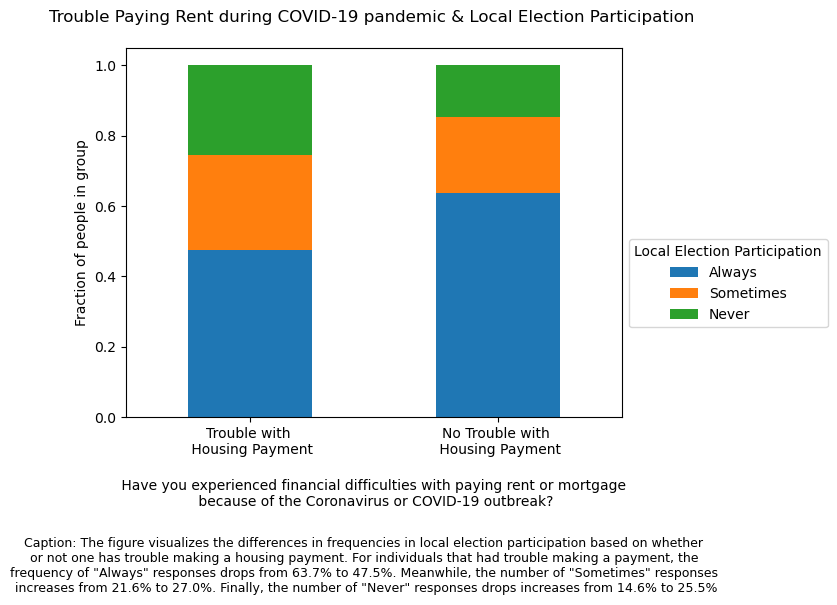

In [23]:
caption = 'Caption: \
The figure visualizes the differences in frequencies in local election participation based on whether \n\
or not one has trouble making a housing payment. For individuals that had trouble making a payment, the \n\
frequency of "Always" responses drops from 63.7% to 47.5%. Meanwhile, the number of "Sometimes" responses \n\
increases from 21.6% to 27.0%. Finally, the number of "Never" responses drops increases from 14.6% to 25.5%'

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of people in group')
plt.xlabel('\n Have you experienced financial difficulties with paying rent or mortgage \n \
because of the Coronavirus or COVID-19 outbreak?')
plt.xticks([0,1], ["Trouble with \n Housing Payment", "No Trouble with \n Housing Payment"], rotation=0)
plt.title('Trouble Paying Rent during COVID-19 pandemic & Local Election Participation \n')
plt.legend(title="Local Election Participation", bbox_to_anchor=(1.0, .5), labels=["Always", "Sometimes", "Never"])
plt.figtext(0.5, -0.25, caption, wrap=True, horizontalalignment='center', fontsize=9) #Add caption
#plt.legend(bbox_to_anchor=(1.0, .5), labels=["Trouble paying rent", "No Trouble paying rent"])
plt.show()

In [32]:
#Visualization #2

count_matrix_2 = data_new.groupby(['ak25', 'am39']).size().unstack()
#print(count_matrix)

count_matrix_norm_2 = count_matrix_2.div(count_matrix_2.sum(axis=1),axis=0)
print(count_matrix_norm_2)

am39                    YES        NO
ak25                                 
NOT ASCERTAINED    0.147992  0.852008
DON'T KNOW         0.333333  0.666667
REFUSED            0.125000  0.875000
OWN                0.168851  0.831149
RENT               0.125943  0.874057
OTHER ARRANGEMENT  0.107056  0.892944


In [25]:
data_new["am39"].unique()

['NO', 'YES']
Categories (2, object): ['YES' < 'NO']

In [35]:
df_counts['count']/df_counts['count'].sum()

0     0.003189
1     0.018361
2     0.000046
3     0.000091
4     0.000046
5     0.000319
6     0.118001
7     0.580847
8     0.030434
9     0.211217
10    0.004009
11    0.033441
Name: count, dtype: float64

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


Text(0.5, -0.15, 'Caption: This bubble plot visualizes the volunteering/organizing in the community by housing status. \nIn essence, the plot is a crosstabs that is summed over both the columns and rows. To this end, the first column \nfrequencies are 1.84% & 0.32%, the second column frequencies are 0.01% & 0.00%, the third column frequencies are \n0.03% & 0.00%, the fourth column frequencies are 58.08% & 11.80%, the fifth column frequencies are 21.12% & 3.04%, \nthe sixth column frequencies are 3.34% & 0.40%.')

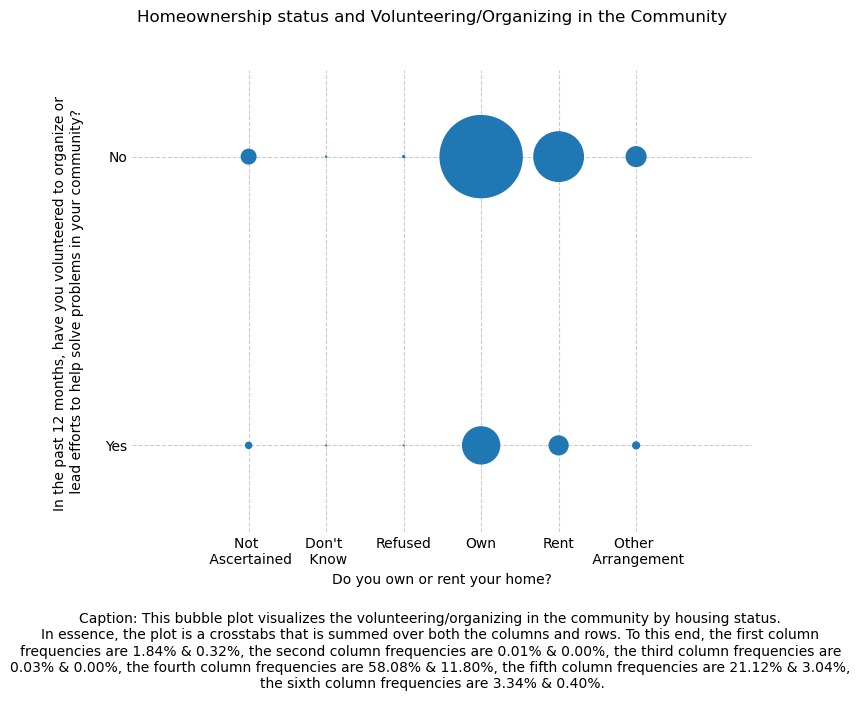

In [36]:
import seaborn as sns 

# Import seaborn sample dataset stored as a pandas dataframe and select

# Compute the counts of observations
df_counts = data_new.groupby(["ak25", "am39"]).size().reset_index()
df_counts.columns.values[df_counts.columns == 0] = 'count'

#labels = ['Own', 'Rent', 'Not Ascertained', 'Other Arrangement', 'Refused', "Don't Know"]

# Compute a size variable for the markers so that they have a good size regardless
# of the total count and the number of unique values in each categorical variable
scale = 500*df_counts['count'].size
size = df_counts['count']/df_counts['count'].sum()*scale

#Caption
txt = 'Caption: \
This bubble plot visualizes the volunteering/organizing in the community by housing status. \n\
In essence, the plot is a crosstabs that is summed over both the columns and rows. To this end, the first column \n\
frequencies are 1.84% & 0.32%, the second column frequencies are 0.01% & 0.00%, the third column frequencies are \n\
0.03% & 0.00%, the fourth column frequencies are 58.08% & 11.80%, the fifth column frequencies are 21.12% & 3.04%, \n\
the sixth column frequencies are 3.34% & 0.40%.'

# Create matplotlib scatter plot with additional formatting
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter("ak25", "am39", size, data=df_counts, zorder=2)
ax.grid(color='grey', linestyle='--', alpha=0.4, zorder=1)
ax.tick_params(length=0, rotation = 0)
ax.set_frame_on(False)
ax.set_yticklabels(('Yes', 'No'))
ax.set_xticklabels(('Not \n Ascertained', "Don't \n Know", 'Refused', 'Own', 'Rent', 'Other \n Arrangement'))
ax.set_xlabel('Do you own or rent your home?')
ax.set_ylabel('In the past 12 months, have you volunteered to organize or \n \
lead efforts to help solve problems in your community? \n')
ax.margins(.3)
fig.suptitle('Homeownership status and Volunteering/Organizing in the Community') # or plt.suptitle('Main title')

fig.text(.5, -.15, txt, ha='center')

#plt.figtext(0.5, -0.25, caption, wrap=True, horizontalalignment='center', fontsize=9) #Add caption

In [37]:
df_counts['count']/df_counts['count'].sum()

0     0.003189
1     0.018361
2     0.000046
3     0.000091
4     0.000046
5     0.000319
6     0.118001
7     0.580847
8     0.030434
9     0.211217
10    0.004009
11    0.033441
Name: count, dtype: float64

In [38]:
CrosstabResult=pd.crosstab(index=data_new['am39'],columns=data_new['ak25'], normalize='all')
print(CrosstabResult)

ak25  NOT ASCERTAINED  DON'T KNOW   REFUSED       OWN      RENT  \
am39                                                              
YES          0.003189    0.000046  0.000046  0.118001  0.030434   
NO           0.018361    0.000091  0.000319  0.580847  0.211217   

ak25  OTHER ARRANGEMENT  
am39                     
YES            0.004009  
NO             0.033441  


In [39]:
data_new['am45'].unique()

['DEFINITELY COULD NOT', 'DEFINITELY COULD', 'MAYBE COULD', 'PROBABLY COULD', 'PROBABLY COULD NOT']
Categories (5, object): ['DEFINITELY COULD NOT' < 'PROBABLY COULD NOT' < 'MAYBE COULD' < 'PROBABLY COULD' < 'DEFINITELY COULD']

am45                           DEFINITELY COULD NOT  PROBABLY COULD NOT  \
ak23                                                                      
HOUSE                                      0.038644            0.077532   
DUPLEX                                     0.059829            0.114774   
BUILDING WITH 3 OR MORE UNITS              0.048334            0.113203   
MOBILE HOME                                0.069100            0.130378   

am45                           MAYBE COULD  PROBABLY COULD  DEFINITELY COULD  
ak23                                                                          
HOUSE                             0.171860        0.293208          0.418756  
DUPLEX                            0.203907        0.269841          0.351648  
BUILDING WITH 3 OR MORE UNITS     0.236072        0.285932          0.316459  
MOBILE HOME                       0.198175        0.303781          0.298566  


Text(0.5, -0.35, 'Caption:As one can see, as one moves across the x-axis the frequency of "Definitely Could Not" responses increases. \nConversely, as one moves across the x-axis, the frequency of "Definitely Could" responses decreases.')

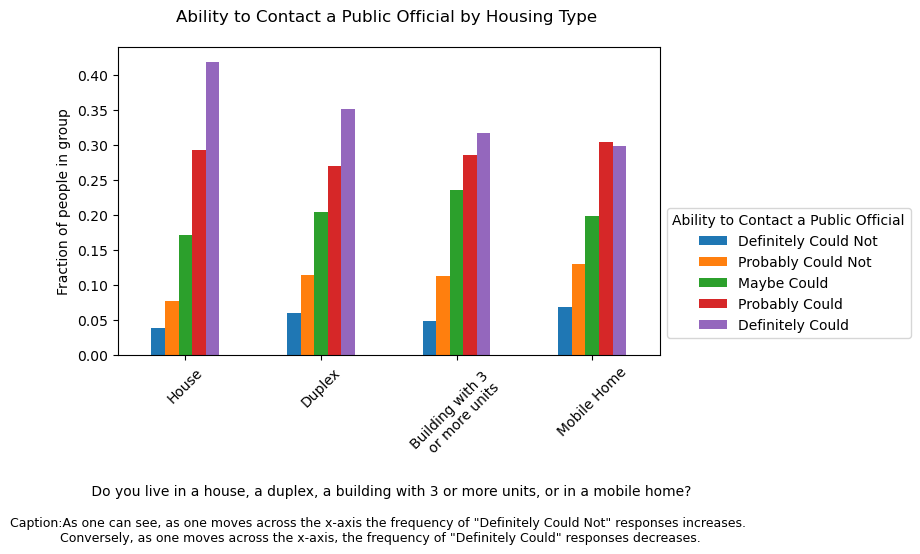

In [47]:
#Visualization #1 category-specific histograms

Caption = 'Caption:\
As one can see, as one moves across the x-axis the frequency of "Definitely Could Not" responses increases. \n\
Conversely, as one moves across the x-axis, the frequency of "Definitely Could" responses decreases.'

CrosstabResult=pd.crosstab(index=data_new['ak23'],columns=data_new['am45'], normalize='index')
print(CrosstabResult)
 
x=[0,1,2,3]    
labels = ["House", "Duplex", "Building with 3 \n or more units", "Mobile Home"]
labels_2 = ['Definitely Could Not', 'Probably Could Not', 'Maybe Could', 'Probably Could', 'Definitely Could']

# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4))
plt.legend(title="Ability to Contact Public Official", bbox_to_anchor=(1.0, .5))

plt.ylabel('Fraction of people in group')
plt.xlabel('\n Do you live in a house, a duplex, a building with 3 or more units, or in a mobile home?')
plt.xticks(x, labels, rotation=45)
plt.title('Ability to Contact a Public Official by Housing Type \n')
plt.legend(title="Ability to Contact a Public Official", bbox_to_anchor=(1.0, .5), labels=labels_2)
plt.figtext(0.5, -0.35, Caption, wrap=True, horizontalalignment='center', fontsize=9) #Add caption
#plt.savefig('Figure_3.png')


# House Type
# Contact public official

In [ ]:
data

In [ ]:
#Search through all of the column names to identify any with "Bsmt" 

#df.columns = df.columns.str.lower() #changes columns to be lower case - not necessary for this pset

data_cols = [col for col in data.columns if 'ap' in col]
#[col for col in df.columns if 'Bsmt' in col] iterates over the list of column names from the command 'df.columns' 
#In this instance, if a column name contains "Bsmt" the variable 'col' will add the column name to the list 'df_cols'

print(data_cols)
print()
print("The total number of columnis will be", len(data_cols))

- What is the target variable? VOTE_ENG2

- Is the problem regression or classification? Classification

- Why is this interesting/important? What is causing lower voter engagement

- Number of data points and number of features.

- Add a 1-2 paragraph description or overview of the features.

- Where did the data come from? How was it collected? 

- If dataset is not well-documented, write a detailed description for each feature (if feature is categorical, describe each category; if feature is numerical, include the unit of the quantity and what it measures)

- If the dataset is from Kaggle/UCI/already described, do some literature search. Write a short description about 2-3 public projects or publications where the data has been used, what did the authors find, what ML question did they solve and how successful they were (evaluation metric and test scores). The results of the previous work gives you expectation for your ML results.


In [ ]:
# Import Packages

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.edge.service import Service
from selenium.webdriver.safari.service import Service
from selenium.webdriver.support.ui import Select # New Addition for this assignment

import pytest
import time

In [ ]:
# Now, extract the downloaded file and copy & paste the .exe file to your PATH

# Run the following code know where to copy and paste the .exe file
import os
import sys
Application_Path = os.path.dirname(sys.executable)
print(Application_Path)

**Find and install a webdriver**

The webdriver will interact with the website just like a browser does, prompting the Javascript on the website to populate the page with the information you want. 

So you need to download such a program. I use Chrome, but there are other options available. 

[This page](https://selenium-python.readthedocs.io/installation.html#drivers) contains links to download many of the most popular webdrivers. (And if you don't see what you need, just Google the name of your browser and "webdriver.")



In [ ]:
#Open Webdriver
driver = webdriver.Chrome(Application_Path + "/chromedriver")

#Go to Brown University's Political Science Department
driver.get("https://www.brown.edu/academics/political-science/")

# Code will pause for 10 seconds
time.sleep(10)

# Webpage and Webdriver will close
driver.close()

In [ ]:
driver = webdriver.Chrome(Application_Path + "/chromedriver")
driver.get("https://healthpolicy.ucla.edu/chis/data/public-use-data-file/Pages/TermsOfUse.aspx?file=/chis/data/public-use-data-file/Documents/adult_2020_stata.zip#")
#First_Page = Select(driver.find_element_by_id("idElection"))
#First_Page.select_by_value('44145') # select by value # Democrat March 3 44145 #Republican March 3 44146
#Democrat July 14 44387 #Republican July 14 44376
driver.find_element_by_css_selector("#ctl00_ctl31_g_f227309b_80c3_4f16_bbe6_462f3408d8c8_ctl00_btnAgree").click()

In [ ]:
r = requests.get("https://healthpolicy.ucla.edu/chis/data/public-use-data-file/Pages/TermsOfUse.aspx?file=/chis/data/public-use-data-file/Documents/adult_2020_stata.zip#") #Saves url location
z = zipfile.ZipFile(io.BytesIO(r.content)) #Reads URL to get data contents
z.extractall(os.getcwd()) #Extract all contents of zip file and save in "os.getcwd()" i.e. current working directory